### Introduction to SQL Sub-Queries

This notebook explore the basics of the use of sub-queries with SQL

###Read data from csv file

In [8]:
import pandas as pd
card_csv = pd.read_csv('cards_HaixiaExtractedFromCPP.csv')

In [9]:
# CREATING THE TABLE
import sqlite3

conn = sqlite3.connect('hollerith.db')#create a database called hollerith.db
print("Opened database successfully");

#create a table named card_data
conn.execute('''
CREATE TABLE IF NOT EXISTS card_data(
AGE_20s integer,
AGE_30s integer,
AGE_40s integer,
AGE_50s integer,
AGE_60s integer,
AGE_70s integer,
MALE integer,
FEMALE integer,
POLYURIA integer,
POLYDIPSIA integer,
SUDDEN_WEIGHT_LOSS integer,
WEAKNESS integer,
POLYPHAGIA integer,
GENITAL_THRUSH integer,
VISUAL_BLURRING integer,
ITCHING integer,
IRRITABILITY integer,
DELAYED_HEALING integer,
PARTIAL_PARESIS integer,
MUSCLE_STIFFNESS integer,
ALOPECIA integer,
OBESITY integer,
DIABETIC integer,
NOTDIABETIC integer);''')

conn.commit()

print("Table created successfully");

conn.close()#we usually close the database after using it

Opened database successfully
Table created successfully


In [10]:
import sqlite3
conn = sqlite3.connect('hollerith.db')#every time we are trying to access the data,
#we need to connect it - wake it up!
conn.execute("PRAGMA table_info(card_data);")#the SQL comments are inside the quotes
conn.commit()
conn.close()#everytime we are done with manipulating database, we need to close it

In [11]:
#convert row to list of numbers that can be inserted to the table
def row2listn(r):
  list_n = []
  for item in r:
    list_n.append(item)
  return list_n

In [12]:
import numpy as np
print(np.shape(card_csv))

(520, 24)


In [13]:
# note that if you already inserted the values, do not need to insert them again and again, otherwise, the rows in the table will growing 
# INSERTING VALUES to the table card_data that exists in the database
conn = sqlite3.connect('hollerith.db')##every time we are trying to access the data, 
#without this line, we will encounter this error: 
# ProgrammingError: Cannot operate on a closed database.

# Iterate through CSV rows with Pandas, insert the data into the card_data table line by line
for idx,row in card_csv.iterrows():
  #first, lets test row, see what it looks like
  list_n = row2listn(row)
  str2insert = str(list_n).replace('[','').replace(']','')#the SQL commands should be string
  conn.execute("INSERT INTO card_data VALUES("+str2insert+");")
  #the SQL comments are inside the quotes. To concatenate pieces of strings, we use +

conn.commit()
conn.close()#everytime we are done with manipulating database, we need to close it

###Demo

Use SQL Commands to calculate the results for :

cards[i][DIABETIC] & cards[i][POLYDIPSIA]

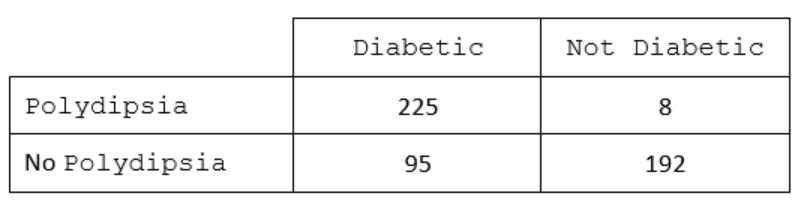

In [14]:
# count Diabetic and Polydipsia

conn = sqlite3.connect('hollerith.db')

cursor = conn.execute(''' SELECT COUNT(*) AS Dia_Poly
                          FROM card_data
                          WHERE Diabetic==1 AND Polydipsia ==1;''')
conn.commit()
for row in cursor:
  print(row)
conn.close()

(225,)


###Your tasks

####Task1:  Use SQL queries to create counts to complete the following table (lets name it tab_dia_alo)

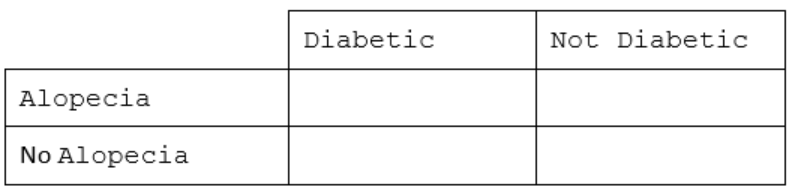

In [16]:
conn = sqlite3.connect('hollerith.db')

cursor = conn.execute(''' SELECT COUNT(*) AS Dia_Poly
                          FROM card_data
                          WHERE Diabetic==1 AND Alopecia ==1;''')
cursor2 = conn.execute(''' SELECT COUNT(*) AS Dia_Poly
                          FROM card_data
                          WHERE Diabetic==0 AND Alopecia ==1;''')
conn.commit()
for row in cursor:
  print(row)
for row in cursor2:
  print(row)
conn.close()

(78,)
(101,)


####Task2: Write the SQL queries to read these numbers from a diabetics table in an SQL database.

#####Task2.1: Create a database named: db_diabetics 

#####Task2.2: Create a table named: tab_dia_alo, in the database db_diabetics.  


Table tab_dia_alo contains 4 columns (diabetic_alopecia, diabetic_noalopecia, notdiabetic_alopecia, notdiabetic_noalopecia)

#####Task2.3 Write the SQL commands to insert the numbers into the table tab_dia_alo

#####Task2.4 Write the SQL queries to read the numbers in the table tab_dia_alo